# Data Context

- Movies' data is stored on several popular websites, but when it comes to critic reviews there is no better place than Rotten Tomatoes. This website allows to compare the ratings given by regular users (audience score) and the ratings given/reviews provided by critics (tomatometer) who are certified members of various writing guilds or film critic-associations.
- Data has been scraped from the publicly available website https://www.rottentomatoes.com as of 2020-10-31.
- Source: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv

# Objective

- The main aim of this exercise is to understand the sentiments in relation to top directors and movie genres 
- Other explorations and analysis to uncover potential patterns in data will also be present in this report

# Data Dictionary

1. rotten_tomatoes_link: link from which the movies data have been scraped - e.g. the record "m/0814255" has been scraped from "https://www.rottentomatoes.com/m/0814255"
2. movie_title: title of the movie as displayed on the Rotten Tomatoes website
3. movie_info: brief description of the movie
3. critics_consensus: comment from Rotten Tomatoes
4. content_rating: category based on the movie suitability for audience
5. genres: movie genres separated by commes, if multiple
6. directors: name of director(s)
7. authors: name of author(s)
8. actors: name of actors
9. original_release_date: date in which the movie has been released
10. streaming_release_date: date in which the movie has been released for streaming
11. runtime: movie runtume (in minutes)
12. production_company: name of the production company
13. name of the production company: tomatometer value of "Rotten" (less than 60% positive reviews), "Fresh" (at least 60% of positive reviews), and "Certified Fresh" (at least 75% of positive reviews, at least 80 reviews of which at least 5 from top critics)
14. tomatometer_rating: percentage of positive critic ratings
15. tomatometer_count: critic ratings counted for the calculation of the tomatomer status
16. audience_status: audience value of "Spilled" (less than 60% of users gave a rating of at least 3.5) or "Upright" (at least 60% of users gave a rating of at least 3.5)
17. audience_rating: percentage of positive user ratings
18. audience_count: user ratings counted for the calculation of the audience status
19. tomatometer_top_critics_count: count of top critic ratings
20. tomatometer_fresh_critics_count: count of fresh critic ratings
21. tomatometer_rotten_critics_count: count of rotten critic ratings

# Import necessary 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Libraries for text mining
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from collections import Counter
from wordcloud import WordCloud
from ast import literal_eval
from textblob import TextBlob #sentiment
from PIL import Image
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('rotten_tomatoes_movies.csv')
df.head()

rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   
3  Sidney Lumet's feature debut is a superbly wri...             NR   
4  One of Disney's finest live-action adventures,...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

   ...      production_company  tomatometer_status tomatometer_rating  \
0  ...        20th Century Fox              Rotten               49.0   
1  ...  Sony Pictures Classics     Certified-Fresh               87.0   
2  ...             Waner Bros.               Fresh               67.0   
3  ...    Criterion Collection     Certified-Fresh              100.0   
4  ...                  Disney               Fresh               89.0   

  tomatometer_count  audience_status  audience_rating audience_count  \
0             149.0          Spilled             53.0       254421.0   
1             142.0          Upright             64.0        11574.0   
2              24.0          Spilled             53.0        14684.0   
3              54.0          Upright             97.0       105386.0   
4              27.0          Upright             74.0        68918.0   

   tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0                             43                               73   
1                             44                              123   
2                              2                               16   
3                              6                               54   
4                              5                               24   

   tomatometer_rotten_critics_count  
0                                76  
1                                19  
2                                 8  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

- A few null values in more than one column, with critic_conensus 48% empty

In [7]:
df.describe().T

count           mean           std  min  \
runtime                           17398.0     102.214048  1.870251e+01  5.0   
tomatometer_rating                17668.0      60.884763  2.844335e+01  0.0   
tomatometer_count                 17668.0      57.139801  6.837005e+01  5.0   
audience_rating                   17416.0      60.554260  2.054337e+01  0.0   
audience_count                    17415.0  143940.068332  1.763577e+06  5.0   
tomatometer_top_critics_count     17712.0      14.586326  1.514635e+01  0.0   
tomatometer_fresh_critics_count   17712.0      36.374831  5.260104e+01  0.0   
tomatometer_rotten_critics_count  17712.0      20.703139  3.024844e+01  0.0   

                                    25%     50%      75%         max  
runtime                            90.0    99.0    111.0       266.0  
tomatometer_rating                 38.0    67.0     86.0       100.0  
tomatometer_count                  12.0    28.0     75.0       574.0  
audience_rating                    45.0    63.0     78.0       100.0  
audience_count                    707.5  4277.0  24988.0  35797635.0  
tomatometer_top_critics_count       3.0     8.0     23.0        69.0  
tomatometer_fresh_critics_count     6.0    16.0     44.0       497.0  
tomatometer_rotten_critics_count    3.0     8.0     24.0       303.0

1. Runtime might have some errors in entry, since min values are only 5mins, rest of the movies span usually from 90 to 111 mins, with larger ones running upto four hours and up
2. average tomatometer_rating around 61, with median of 67
3. average audience_rating around 61 with a median of 63


In [8]:
df.describe(include='object').T

count unique  \
rotten_tomatoes_link    17712  17712   
movie_title             17712  17106   
movie_info              17391  17389   
critics_consensus        9134   9132   
content_rating          17712      6   
genres                  17693   1106   
directors               17518   8933   
authors                 16170  12989   
actors                  17360  17330   
original_release_date   16546   5804   
streaming_release_date  17328   2271   
production_company      17213   3046   
tomatometer_status      17668      3   
audience_status         17264      2   

                                                                      top  \
rotten_tomatoes_link                                            m/0814255   
movie_title                                                        Hamlet   
movie_info              Wisecracking mercenary Deadpool meets Russell,...   
critics_consensus       High Life is as visually arresting as it is ch...   
content_rating                                                          R   
genres                                                              Drama   
directors                                                  Clint Eastwood   
authors                                                       Woody Allen   
actors                                                      Werner Herzog   
original_release_date                                          2002-01-01   
streaming_release_date                                         2016-08-10   
production_company                                     Paramount Pictures   
tomatometer_status                                                 Rotten   
audience_status                                                   Upright   

                        freq  
rotten_tomatoes_link       1  
movie_title                6  
movie_info                 2  
critics_consensus          2  
content_rating          6377  
genres                  1887  
directors                 38  
authors                   33  
actors                     4  
original_release_date     29  
streaming_release_date  1235  
production_company       517  
tomatometer_status      7565  
audience_status         9390

In [9]:
df['genres'].value_counts()

Drama                                                                                  1887
Comedy                                                                                 1263
Comedy, Drama                                                                           863
Drama, Mystery & Suspense                                                               731
Art House & International, Drama                                                        589
                                                                                       ... 
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy       1
Action & Adventure, Cult Movies, Drama, Science Fiction & Fantasy                         1
Art House & International, Documentary, Sports & Fitness                                  1
Action & Adventure, Drama, Mystery & Suspense, Special Interest                           1
Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense            

# Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

array([[<AxesSubplot:title={'center':'audience_count'}>,
        <AxesSubplot:title={'center':'tomatometer_top_critics_count'}>],
       [<AxesSubplot:title={'center':'tomatometer_fresh_critics_count'}>,
        <AxesSubplot:title={'center':'tomatometer_rotten_critics_count'}>],
       [<AxesSubplot:title={'center':'tomatometer_count'}>,
        <AxesSubplot:>]], dtype=object)

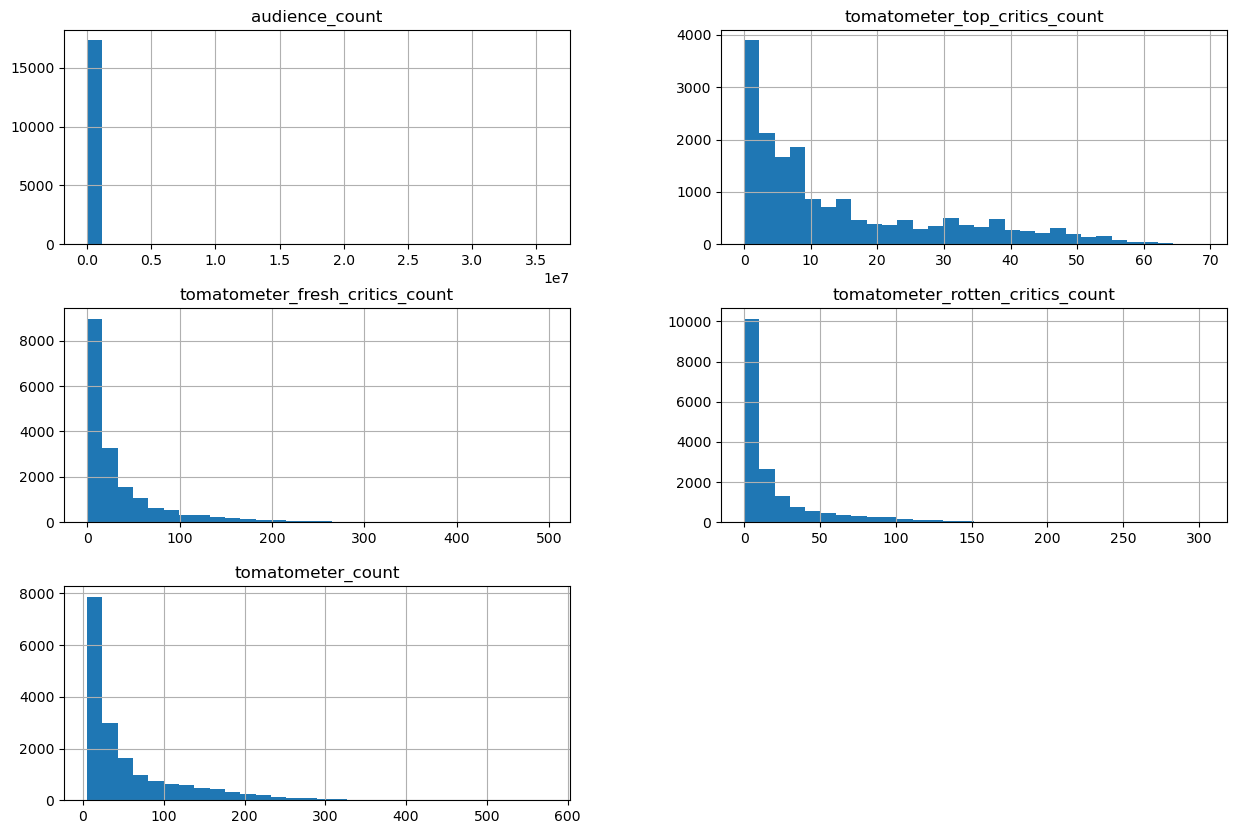

In [11]:
# create a new df to retain information of columns we may drop
# The following columns will not be analyzed further -

temp = df[['rotten_tomatoes_link','movie_info','audience_count','tomatometer_top_critics_count',
          'tomatometer_fresh_critics_count','tomatometer_rotten_critics_count',
          'tomatometer_count','tomatometer_status']]

# we remove these columns as:
# rotten_tomatoes_link is irrevelant with movie_title column
# audiance_count, tomatometer_top_critics_count, tomatometer_fresh_critics_count,
# tomatometer_rotten_critics_count also are not very relevant, since number of
# voters does not have that much to do with the score itself
# Also counts of audience and tomatometer are reflected in audience_status &
# tomatometer_status
# we drop tomatometer_status because the information in audience status is
# the exact same

# plot histograms to get a sense of what the dropped data looks like
temp.hist(bins=30, figsize=(15, 10))

In [12]:
df = df.drop(['rotten_tomatoes_link','audience_count','tomatometer_top_critics_count',
          'tomatometer_fresh_critics_count','tomatometer_rotten_critics_count','tomatometer_count'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             17712 non-null  object 
 1   movie_info              17391 non-null  object 
 2   critics_consensus       9134 non-null   object 
 3   content_rating          17712 non-null  object 
 4   genres                  17693 non-null  object 
 5   directors               17518 non-null  object 
 6   authors                 16170 non-null  object 
 7   actors                  17360 non-null  object 
 8   original_release_date   16546 non-null  object 
 9   streaming_release_date  17328 non-null  object 
 10  runtime                 17398 non-null  float64
 11  production_company      17213 non-null  object 
 12  tomatometer_status      17668 non-null  object 
 13  tomatometer_rating      17668 non-null  float64
 14  audience_status         17264 non-null

In [13]:
# create another dataframe, but only with critics_consensus not present
# due to the large number of null values present in critics_consensus
# we will analyze it is a seperate df later

data = df.drop(['critics_consensus'], axis = 1)

# drop nulls & diplicates
data = data.dropna().drop_duplicates()
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 17711
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             14438 non-null  object 
 1   movie_info              14438 non-null  object 
 2   content_rating          14438 non-null  object 
 3   genres                  14438 non-null  object 
 4   directors               14438 non-null  object 
 5   authors                 14438 non-null  object 
 6   actors                  14438 non-null  object 
 7   original_release_date   14438 non-null  object 
 8   streaming_release_date  14438 non-null  object 
 9   runtime                 14438 non-null  float64
 10  production_company      14438 non-null  object 
 11  tomatometer_status      14438 non-null  object 
 12  tomatometer_rating      14438 non-null  float64
 13  audience_status         14438 non-null  object 
 14  audience_rating         14438 non-null

In [14]:
# check 
data['genres'].unique()


array(['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy',
       'Comedy', 'Comedy, Romance', 'Classics, Drama',
       'Action & Adventure, Drama, Kids & Family',
       'Action & Adventure, Classics, Drama',
       'Action & Adventure, Classics, Mystery & Suspense',
       'Classics, Drama, Western', 'Comedy, Drama, Romance',
       'Art House & International, Horror, Mystery & Suspense',
       'Drama, Mystery & Suspense', 'Drama', 'Classics, Comedy, Romance',
       'Art House & International, Drama, Faith & Spirituality',
       'Action & Adventure, Animation, Kids & Family',
       'Documentary, Special Interest',
       'Action & Adventure, Classics, Romance',
       'Classics, Drama, Mystery & Suspense',
       'Comedy, Horror, Mystery & Suspense',
       'Art House & International, Drama',
       'Drama, Science Fiction & Fantasy, Romance',
       'Action & Adventure, Drama, Mystery & Suspense',
       'Action & Adventure, Drama, Horror, Science Fiction & Fantasy'

In [15]:
# genre columns all entries have more than 1 genre, but that makes the information a lot
# less accessible
# we will create a new column, that will store the first genre of every movie
# as the main genre of that movie

# split on ',' and take the first element after split
data['main_genre'] = data['genres'].str.split(',',expand = True)[0]

data.head()

movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info content_rating  \
0  Always trouble-prone, the life of teenager Per...             PG   
1  Kate (Catherine Keener) and her husband Alex (...              R   
2  A successful, middle-aged Hollywood songwriter...              R   
3  Following the closing arguments in a murder tr...             NR   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

  streaming_release_date  runtime      production_company tomatometer_status  \
0             2015-11-25    119.0        20th Century Fox             Rotten   
1             2012-09-04     90.0  Sony Pictures Classics    Certified-Fresh   
2             2014-07-24    122.0             Waner Bros.              Fresh   
3             2017-01-13     95.0    Criterion Collection    Certified-Fresh   
4             2016-06-10    127.0                  Disney              Fresh   

   tomatometer_rating audience_status  audience_rating          main_genre  
0                49.0         Spilled             53.0  Action & Adventure  
1                87.0         Upright             64.0              Comedy  
2                67.0         Spilled             53.0              Comedy  
3               100.0         Upright             97.0            Classics  
4                89.0         Upright             74.0  Action & Adventure

In [16]:
# now we clean the two date columns
# first convert both into date time

data['original_release_date'] = pd.to_datetime(data['original_release_date']) 
data['streaming_release_date'] = pd.to_datetime(data['streaming_release_date'])

# now create year and month columns for both dates

data['original_release_year'] = data['original_release_date'].dt.year
data['original_release_month'] = data['original_release_date'].dt.month
data['streaming_release_year'] = data['streaming_release_date'].dt.year
data['streaming_release_month'] = data['streaming_release_date'].dt.month

# Map month names instead of their numerical counterparts

import calendar

# create a loop to iterate over months 
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# map iterated months to the column values
data['original_release_month'] = data['original_release_month'].map(month_names)
data['streaming_release_month'] = data['streaming_release_month'].map(month_names)

# check

data.head()

movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info content_rating  \
0  Always trouble-prone, the life of teenager Per...             PG   
1  Kate (Catherine Keener) and her husband Alex (...              R   
2  A successful, middle-aged Hollywood songwriter...              R   
3  Following the closing arguments in a murder tr...             NR   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

  streaming_release_date  runtime      production_company tomatometer_status  \
0             2015-11-25    119.0        20th Century Fox             Rotten   
1             2012-09-04     90.0  Sony Pictures Classics    Certified-Fresh   
2             2014-07-24    122.0             Waner Bros.              Fresh   
3             2017-01-13     95.0    Criterion Collection    Certified-Fresh   
4             2016-06-10    127.0                  Disney              Fresh   

   tomatometer_rating audience_status  audience_rating          main_genre  \
0                49.0         Spilled             53.0  Action & Adventure   
1                87.0         Upright             64.0              Comedy   
2                67.0         Spilled             53.0              Comedy   
3               100.0         Upright             97.0            Classics   
4                89.0         Upright             74.0  Action & Adventure   

   original_release_year original_release_month  streaming_release_year  \
0                   2010               February                    2015   
1                   2010                  April                    2012   
2                   1979                October                    2014   
3                   1957                  April                    2017   
4                   1954                January                    2016   

  streaming_release_month  
0                November  
1               September  
2                    July  
3                 January  
4                    June

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 17711
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   movie_title              14438 non-null  object        
 1   movie_info               14438 non-null  object        
 2   content_rating           14438 non-null  object        
 3   genres                   14438 non-null  object        
 4   directors                14438 non-null  object        
 5   authors                  14438 non-null  object        
 6   actors                   14438 non-null  object        
 7   original_release_date    14438 non-null  datetime64[ns]
 8   streaming_release_date   14438 non-null  datetime64[ns]
 9   runtime                  14438 non-null  float64       
 10  production_company       14438 non-null  object        
 11  tomatometer_status       14438 non-null  object        
 12  tomatometer_rating       14438 n

#### Text cleaning

In [18]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [19]:
# We clean critics_consensus column and create a new column to use for later
df['critics_consensus_clean'] = df['critics_consensus'].map(lambda x: preprocess(x))

- now the data is ready for some Exploratory Data Analysis

# EDA

In [20]:
# create a groupby df and count number of movies released per year
# sort by release year
d1 = data.groupby(['original_release_year'])['genres'].count()
d1 = pd.DataFrame(d1).reset_index()
d1.sort_values(by=['original_release_year'], inplace=True)
d1

original_release_year  genres
0                     1914       1
1                     1915       2
2                     1916       1
3                     1919       1
4                     1920       6
..                     ...     ...
100                   2016     526
101                   2017     502
102                   2018     540
103                   2019     319
104                   2020     160

[105 rows x 2 columns]

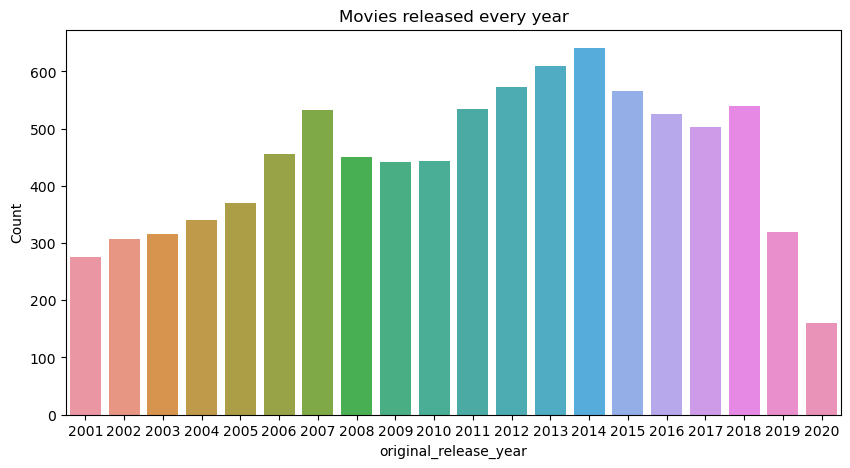

In [21]:
# plot the group by df

plt.figure(figsize=(10,5))

sns.barplot(x='original_release_year', y='genres', data=d1[-20:])

plt.xlabel('original_release_year')

plt.ylabel('Count')

plt.title('Movies released every year')

plt.show()

- Higher number of movies are release every year since 2010
- 2020 had a lower number of movies release, but that could be because the dataset stops at 2020, or due to covid 

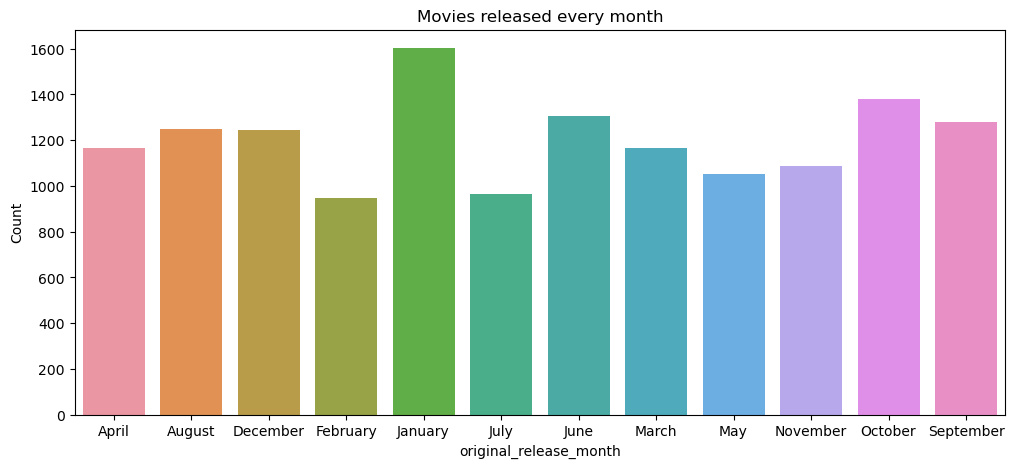

In [22]:
# create another groupby df to plot but this time by month
d2 = data.groupby(['original_release_month'])['genres'].count()
d2 = pd.DataFrame(d2).reset_index()

# plot the group by object

plt.figure(figsize=(12,5))

sns.barplot(x='original_release_month', y='genres', data=d2)

plt.xlabel('original_release_month')

plt.ylabel('Count')

plt.title('Movies released every month')

plt.show()

- January has the highest number of movies released across the years, followed by October then September

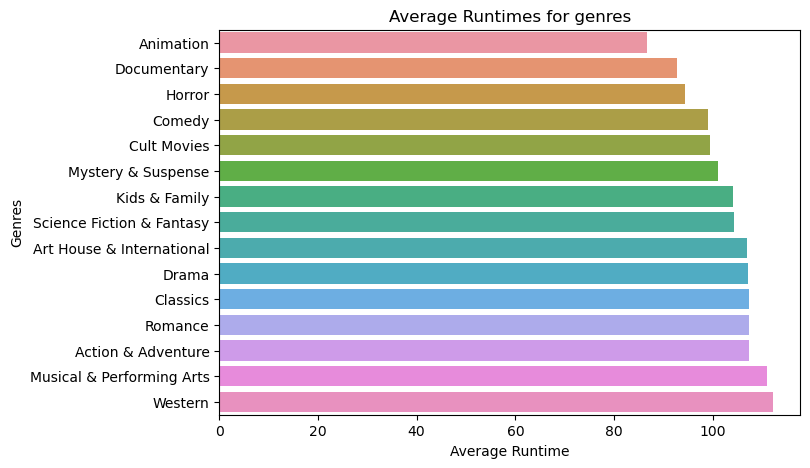

In [23]:
# create another groupby df to plot but this time by generes & get the
# mean runtime for movies of certain genres

d3 = data.groupby(['main_genre'])['runtime'].mean()
d3 = pd.DataFrame(d3).reset_index()
d3.sort_values(by=['runtime'], inplace=True)

# plot the group by object

plt.figure(figsize=(7.5,5))

sns.barplot(x='runtime', y='main_genre', data=d3)

plt.xlabel('Average Runtime')

plt.ylabel('Genres')

plt.title('Average Runtimes for genres')

plt.show()

- Western movies have the longest runtimes - which could be since westerns were more popular earlier years and movies ran longer in duration on average (will run a check on this shortly)
- Next up is musicals, which is as expected, since music within the movie itself takes up quite an amount of time
- Action & adventure & romance follow that which is also not unexpected as plots for those type of movies take time to fully unfold

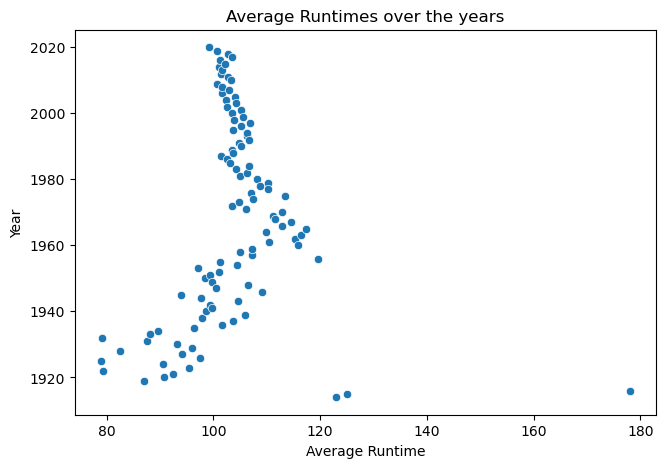

In [24]:
# create another groupby df to plot but this time by years & get the
# mean runtime for movies over the years

d4 = data.groupby(['original_release_year'])['runtime'].mean()
d4 = pd.DataFrame(d4).reset_index()
d4.sort_values(by=['runtime'], inplace=True)

# plot the group by object

plt.figure(figsize=(7.5,5))

sns.scatterplot(x='runtime', y='original_release_year', data=d4)

plt.xlabel('Average Runtime')

plt.ylabel('Year')

plt.title('Average Runtimes over the years')

plt.show()

- movie runtimes peaked around the 1960s-1980s but slowly declined as we get to the present age
- Earlier years movie runtimes were not as consistently similar as they are now

In [25]:
# create a function to help plot percentage class of each category
# for categorical variables only

def pb(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 
    plt.show() 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 17711
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   movie_title              14438 non-null  object        
 1   movie_info               14438 non-null  object        
 2   content_rating           14438 non-null  object        
 3   genres                   14438 non-null  object        
 4   directors                14438 non-null  object        
 5   authors                  14438 non-null  object        
 6   actors                   14438 non-null  object        
 7   original_release_date    14438 non-null  datetime64[ns]
 8   streaming_release_date   14438 non-null  datetime64[ns]
 9   runtime                  14438 non-null  float64       
 10  production_company       14438 non-null  object        
 11  tomatometer_status       14438 non-null  object        
 12  tomatometer_rating       14438 n

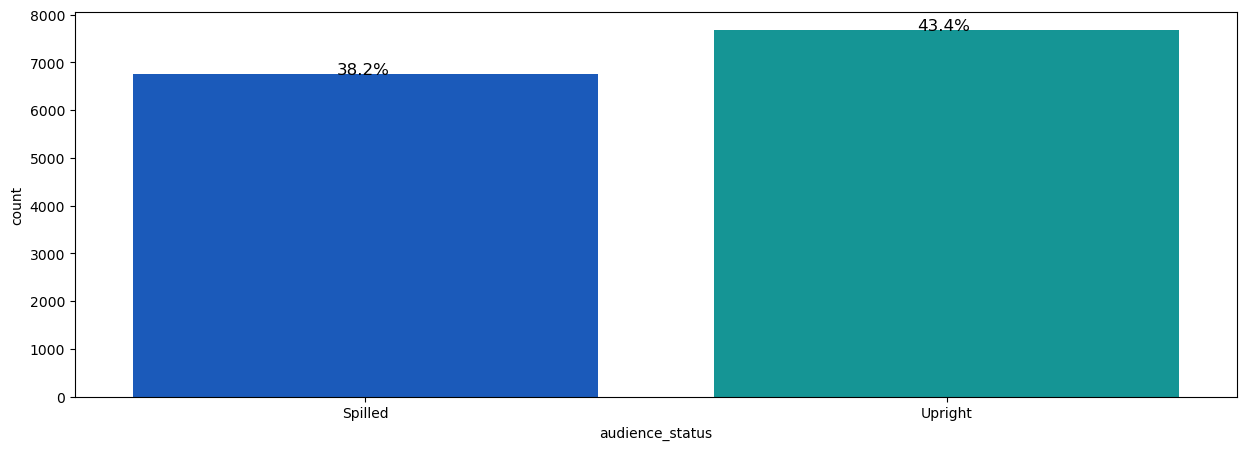

In [27]:
# get the split of audience status

plt.figure(figsize=(15,5))
ax = sns.countplot(data["audience_status"],palette='winter')
pb(ax,df["audience_status"])

- Highest % of movies are rotten, followed by fresh, and then by certified-Fresh
- Follows logic, as the highest rated movies are more rare to come across

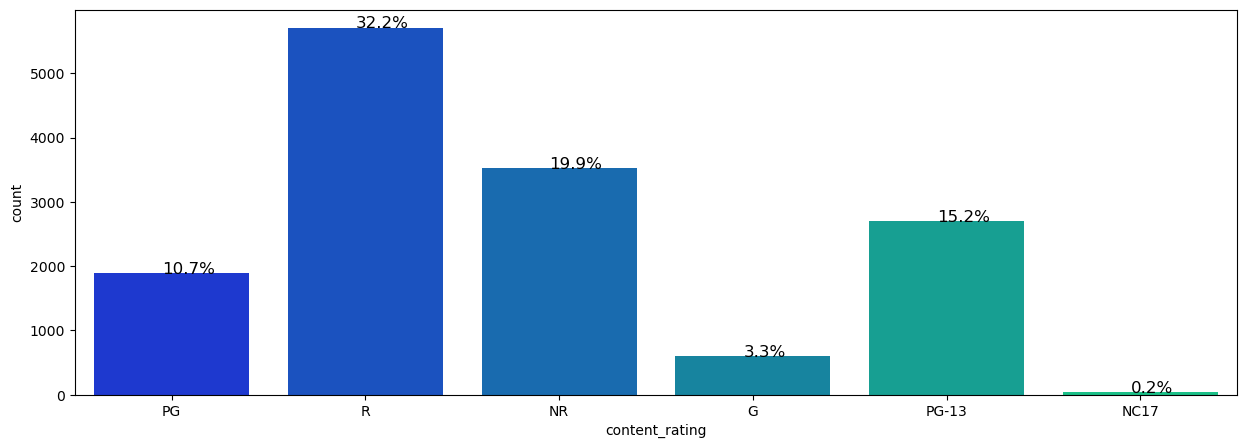

In [28]:
# get the split of content_rating

plt.figure(figsize=(15,5))
ax = sns.countplot(data["content_rating"],palette='winter')
pb(ax,df["content_rating"])

- Most movies are R rating, followed by NR then by PG-13

In [29]:
data.sample(3)

movie_title                                         movie_info  \
2278         About a Boy  A comedy-drama starring Hugh Grant as Will, a ...   
13689  Spider in the Web  Adereth is an aging spy who's on one last miss...   
13327             Simone  A contemporary satire on Hollywood, "Simone" i...   

      content_rating                                    genres  \
2278           PG-13                    Comedy, Drama, Romance   
13689             NR                 Drama, Mystery & Suspense   
13327          PG-13  Comedy, Drama, Science Fiction & Fantasy   

                     directors                                authors  \
2278   Chris Weitz, Paul Weitz  Peter Hedges, Chris Weitz, Paul Weitz   
13689              Eran Riklis         Emmanuel Naccache, Gidon Miron   
13327            Andrew Niccol                          Andrew Niccol   

                                                  actors  \
2278   Hugh Grant, Toni Collette, Rachel Weisz, Nicho...   
13689  Ben Kingsley, Monica Bellucci, Itay Tiran, Hil...   
13327  Al Pacino, Catherine Keener, Rachel Roberts (I...   

      original_release_date streaming_release_date  runtime  \
2278             2002-05-17             2016-04-19    100.0   
13689            2019-08-30             2019-08-30    114.0   
13327            2002-08-23             2016-04-29    117.0   

           production_company tomatometer_status  tomatometer_rating  \
2278       Universal Pictures    Certified-Fresh                93.0   
13689  Vertical Entertainment              Fresh                75.0   
13327         New Line Cinema             Rotten                50.0   

      audience_status  audience_rating main_genre  original_release_year  \
2278          Spilled             55.0     Comedy                   2002   
13689         Spilled             40.0      Drama                   2019   
13327         Spilled             35.0     Comedy                   2002   

      original_release_month  streaming_release_year streaming_release_month  
2278                     May                    2016                   April  
13689                 August                    2019                  August  
13327                 August                    2016                   April

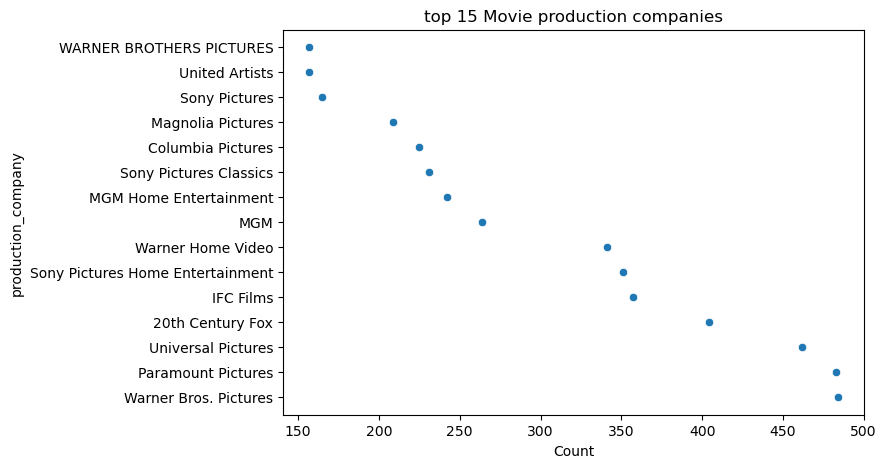

In [30]:
# create another groupby df to plot but this time by production company & get 
# the count of movies

d5 = data.groupby(['production_company'])['movie_title'].count()
d5 = pd.DataFrame(d5).reset_index()
d5.sort_values(by=['movie_title'], inplace=True)

# plot the group by object

plt.figure(figsize=(7.5,5))

sns.scatterplot(x='movie_title', y='production_company', data=d5[-15:])

plt.xlabel('Count')

plt.ylabel('production_company')

plt.title('top 15 Movie production companies')

plt.show()

 - We see a lot of familiar names, Warner brothers come in twice (due to incorrectly entering the name twice),followed by; Sony, Mgm, 20th Century Fox

<AxesSubplot:>

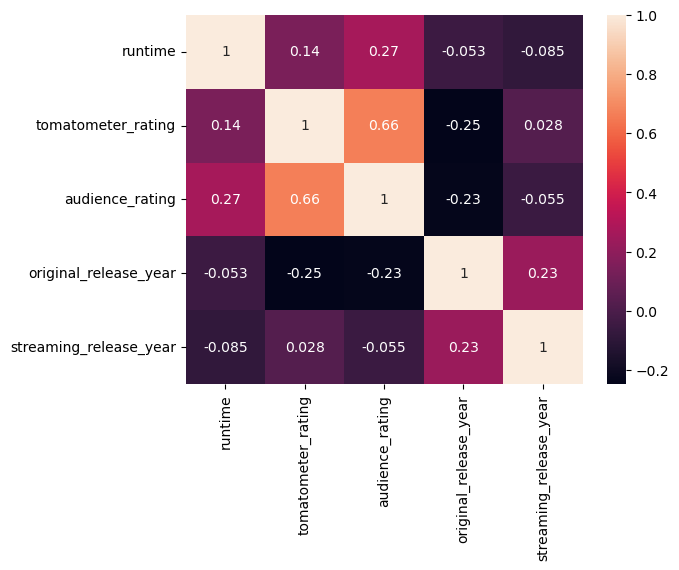

In [31]:
# get a correlation heatmap to see if there other patterns in the numerical data
corr = data.corr()
sns.heatmap(corr, annot=True)

- runtime weakly correlates with audience_rating
- Tomatometer_rating correlates moderately with adience rating, which shows the difference in opinion between critics and audience

(array([  29.,  294.,  894., 1525., 1954., 2062., 2265., 2490., 2230.,
         695.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

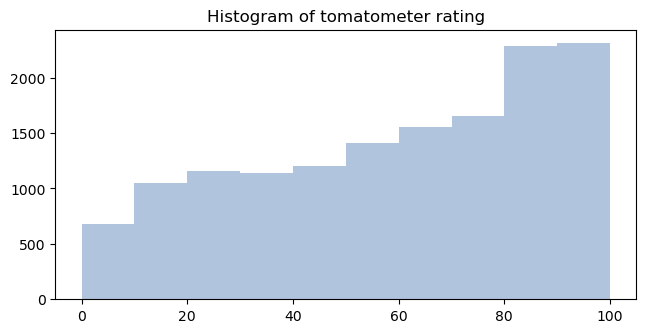

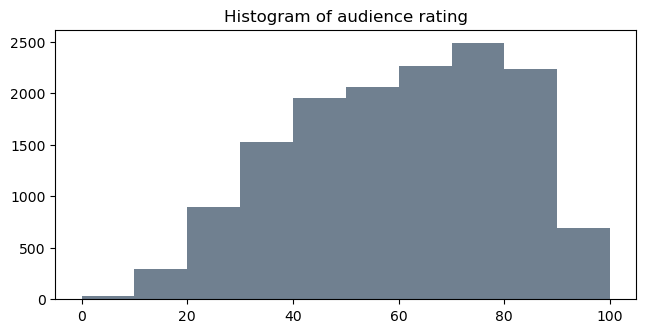

In [32]:
# plot histograms for audience rating & tomatomer_rating

plt.figure( figsize=(7.5,3.5))
plt.title('Histogram of tomatometer rating')
plt.hist(data['tomatometer_rating'], bins = 10, histtype='bar', color='lightsteelblue')

plt.figure( figsize=(7.5,3.5))
plt.title('Histogram of audience rating')
plt.hist(data['audience_rating'], bins = 10, histtype='bar', color='slategrey')

- Interesting to note that audience ratings peak lower than critic ratings
- Additionally, critics have a lot more movies that are rated around 30 or lower
- So, when it comes to rating movies extremely positively (score of >= 90) the audience is more stingy than critics, but when it comes to rating movies very harshly (<= 30) critics have a lot more sores there than the audience. So the audience doesn't like admitting when a movie is excellent unlike the critic, but also does not like to completely disparage movies as once again opposed to critics. At the extremes the audience and the critics display contrary behaviors. 

In [33]:
data['directors'].value_counts()

Alfred Hitchcock                        36
Woody Allen                             35
Clint Eastwood                          35
Steven Spielberg                        30
Sidney Lumet                            29
                                        ..
Jon S. Baird                             1
Michael D. Olmos, Youssef Delara         1
Stephen Merchant                         1
Eddie O'Flaherty                         1
Byron Howard, Rich Moore, Jared Bush     1
Name: directors, Length: 7093, dtype: int64

In [34]:
data['authors'].value_counts()

Woody Allen                                             33
Neil Simon                                              19
David Mamet                                             18
Tyler Perry                                             18
Werner Herzog                                           18
                                                        ..
Merav Doster                                             1
Ayesha Devitre, Shakun Batra, Ayesha Devitre Dhillon     1
Vidhu Vinod Chopra, Abhijat Joshi, Swanand Kirkire       1
Fernando Trueba, Jean-Claude Carriere                    1
Cy Endfield, Anthony Storey                              1
Name: authors, Length: 11613, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 17711
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   movie_title              14438 non-null  object        
 1   movie_info               14438 non-null  object        
 2   content_rating           14438 non-null  object        
 3   genres                   14438 non-null  object        
 4   directors                14438 non-null  object        
 5   authors                  14438 non-null  object        
 6   actors                   14438 non-null  object        
 7   original_release_date    14438 non-null  datetime64[ns]
 8   streaming_release_date   14438 non-null  datetime64[ns]
 9   runtime                  14438 non-null  float64       
 10  production_company       14438 non-null  object        
 11  tomatometer_status       14438 non-null  object        
 12  tomatometer_rating       14438 n

In [36]:
# create another groupby df to plot but this time by directors & get the
# mean ratings for movies 

d6 = data.groupby(['directors'])['audience_rating'].mean()
d6 = pd.DataFrame(d6).reset_index()
d6.sort_values(by=['audience_rating'], inplace=True)

d6.tail(15)

directors  audience_rating
2163               Fernando Meirelles, Kátia Lund             97.0
5154                              Pamela B. Green             97.0
6146                                Sergio Pablos             97.0
3398                               John J. Budion             98.0
2817                               Jacob Hamilton             98.0
5093                                     Oded Raz             99.0
202                                 Alex Pettyfer             99.0
3563                                 Jonathan Lim             99.0
594                                   Bailey Kobe            100.0
3032  Jean-Jacques Mantello, Jean-Michel Cousteau            100.0
5898                                 Romany Malco            100.0
4981    Nicholas Eliopoulos, Nicholas Eliopoulous            100.0
441                                   Anne Aghion            100.0
5928                             Rotimi Rainwater            100.0
5010                Nick Louvel, Michele Mitchell            100.0

In [37]:
# create another groupby df to plot but this time by authors & get the
# mean ratings for movies 

d7 = data.groupby(['authors'])['audience_rating'].mean()
d7 = pd.DataFrame(d7).reset_index()
d7.sort_values(by=['audience_rating'], inplace=True)

d7.tail(10)

authors  audience_rating
7946                                   Michele Mitchell            100.0
2728                 David Metcalfe, Bill Morrison (II)            100.0
9761                                   Rotimi Rainwater            100.0
4926                                   Janelle Balnicke            100.0
2409                                      Daniel Myrick            100.0
2573  David Chocron, François Mantello, Jean-Jacques...            100.0
2485                                     Darren Longley            100.0
9159                      Reiko Yoshida, Stephanie Sheh            100.0
9689                                       Romany Malco            100.0
676                   Ang Lee, James Schamus, Neil Peng            100.0

In [38]:
# define a function to plot barplots after grouping by original_release_year & running a count
# the function also checks if certain keywords are present in a selected column
# and creates barplots accordingly

def keyword_trend(keyword, col,  regex=True, aspect=3):
    tick = np.arange(1914, 2021, step=1)
    f1 = data[data[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby(['original_release_year']).agg({"movie_title":"count"}).reset_index()
    f2 = f1[~((f1['original_release_year'] == '') | (f1['original_release_year'] == 'nan'))]
    sns.catplot(data=f2, kind='bar', x='original_release_year', y='movie_title'
            , aspect=aspect
            , palette='Purples'
           )
    plt.title(f'Trend of films contain LGBTQ themes through out the years')

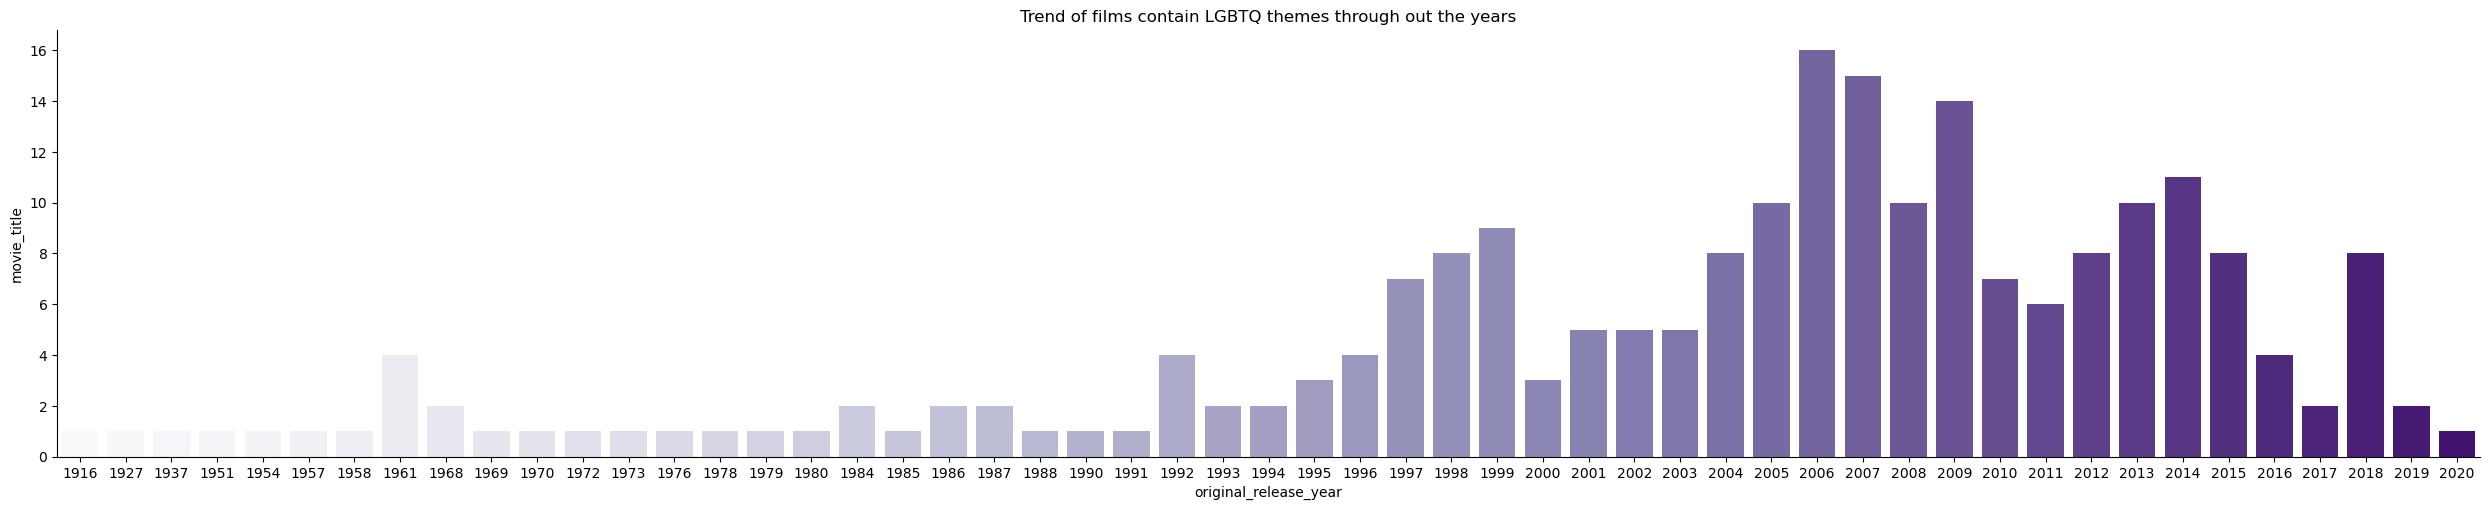

In [39]:
# run the function to check how many movies have been created over the years with LGBTQ themes
keyword_trend(r'LGBT|lgbt|Lesbian|lesbian|Gay|gay|Bisexual|bisexual|Transgender|transgender|Queer|queer|Asexual|Pansexual|Non-binary', 'movie_info',aspect=5)

- As we would expect, number of films regarding these themes are very low throughout the years
- from 2006 to present times we see a lot more movies that contain these themes, which follows the change in socio-cultural norms as we get closer to present times

In [40]:
# similar function as before except now it plots keywords by tomatometer_status

def keyword_rotten(keyword, col, regex=True, aspect=3):
    f1 = data[data[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby('tomatometer_status').agg({"movie_title":"count"}).reset_index()
    f2 = f1[~(f1['tomatometer_status'] == '')]
    sns.catplot(data=f2, kind='bar'
                , x='tomatometer_status', y='movie_title'
                , aspect=aspect
                , palette='RdYlGn'
               )
    plt.xticks(rotation=0)
    plt.title(f'Number of films contain this keyword: "{keyword}" by status')

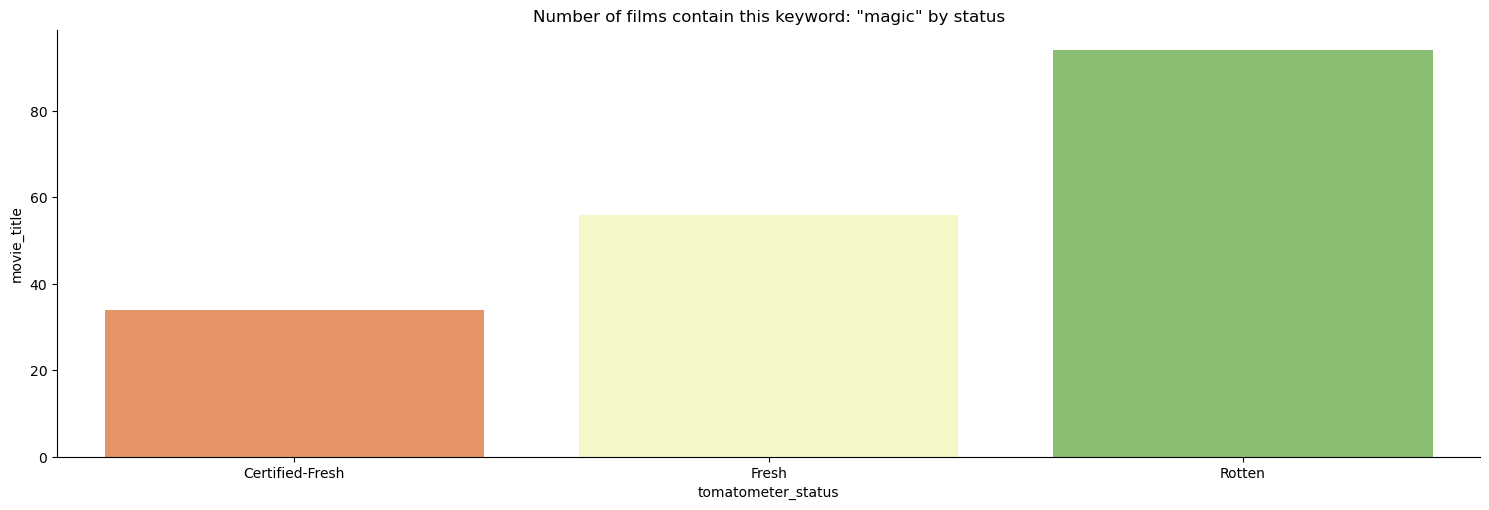

In [41]:
keyword_rotten('magic', 'movie_info')

- Fantasy and magic is a common theme across the ages, interesting to note that almost 50% of the overall movies made with these themes have been received positively 

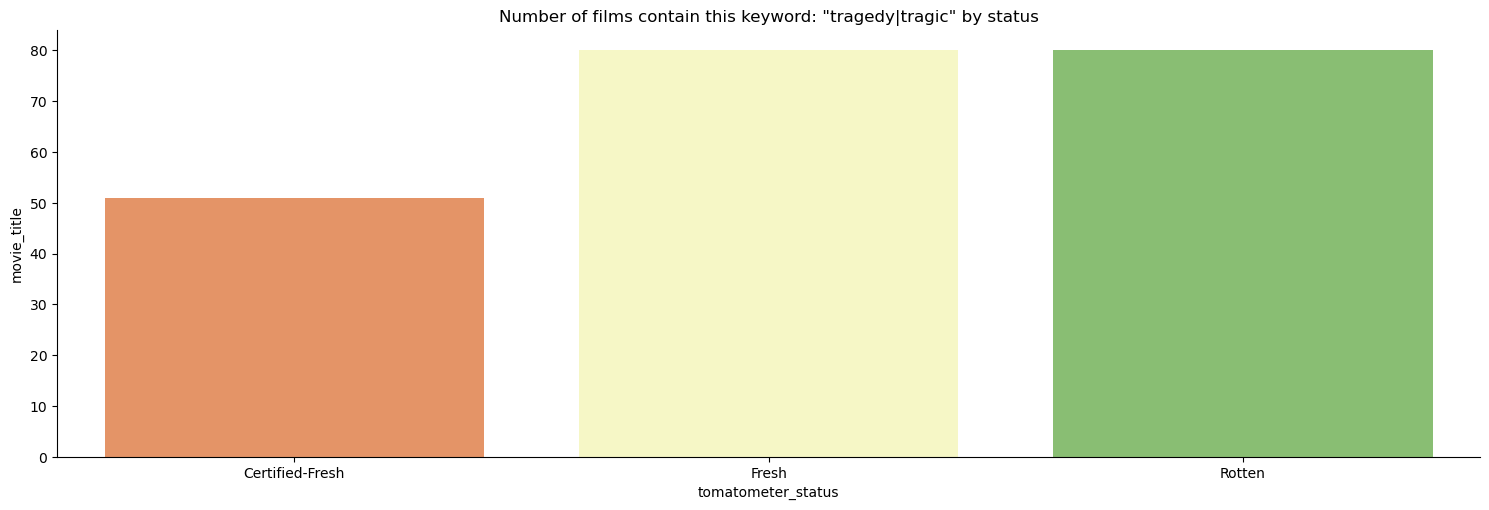

In [42]:
keyword_rotten(r'tragedy|tragic', 'movie_info')

- Tragedy is also a common theme that is difficult to execute, but with more than 50% of the movies receiving a fresh or higher status, it shows that this theme is a very viable options

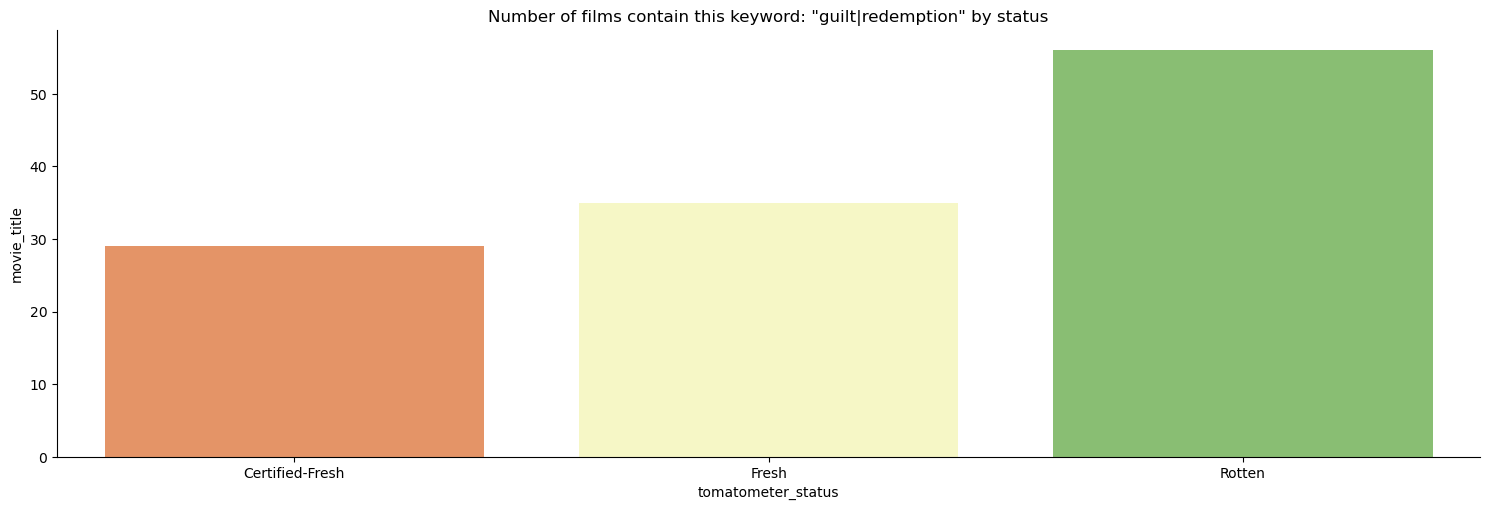

In [43]:
keyword_rotten(r'guilt|redemption', 'movie_info')

- Another common theme or themes it the idea of guilt and redemption. In movies and in life these two are concepts that the audience can easily relate to and could be another option to explore

# Text analysis

In [44]:
# re check the df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_title              17712 non-null  object 
 1   movie_info               17391 non-null  object 
 2   critics_consensus        9134 non-null   object 
 3   content_rating           17712 non-null  object 
 4   genres                   17693 non-null  object 
 5   directors                17518 non-null  object 
 6   authors                  16170 non-null  object 
 7   actors                   17360 non-null  object 
 8   original_release_date    16546 non-null  object 
 9   streaming_release_date   17328 non-null  object 
 10  runtime                  17398 non-null  float64
 11  production_company       17213 non-null  object 
 12  tomatometer_status       17668 non-null  object 
 13  tomatometer_rating       17668 non-null  float64
 14  audience_status       

In [45]:
# drop all null values
df=df.dropna()

In [46]:
# start by building a df for all 3 statuses; rotten, fresh and certified fresh

rotten = df.loc[(df['tomatometer_status']=='Rotten')]
fresh = df.loc[(df['tomatometer_status']=='Fresh')]
cert = df.loc[(df['tomatometer_status']=='Certified-Fresh')]

#### Now we build a word cloud for each Audience rating status

<IPython.core.display.Javascript object>


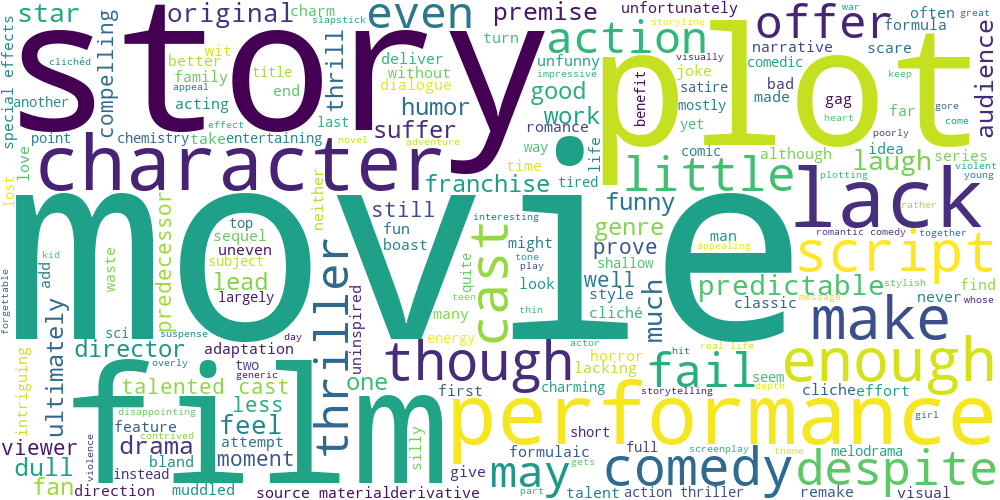

In [47]:
# rotten word cloud

text = " ".join(rotten["critics_consensus_clean"])
wordcloud = WordCloud(width=1000, height=500, background_color = 'white',).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Rotten Status")
fig.show()

<IPython.core.display.Javascript object>


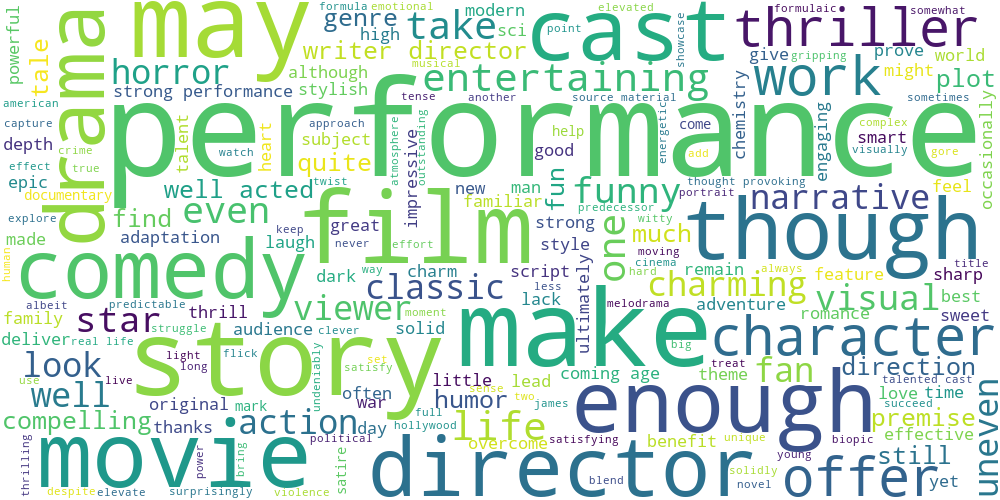

In [48]:
# Fresh word cloud

text = " ".join(fresh["critics_consensus_clean"])
wordcloud = WordCloud(width=1000, height=500, background_color = 'white',).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Fresh Status")
fig.show()

<IPython.core.display.Javascript object>


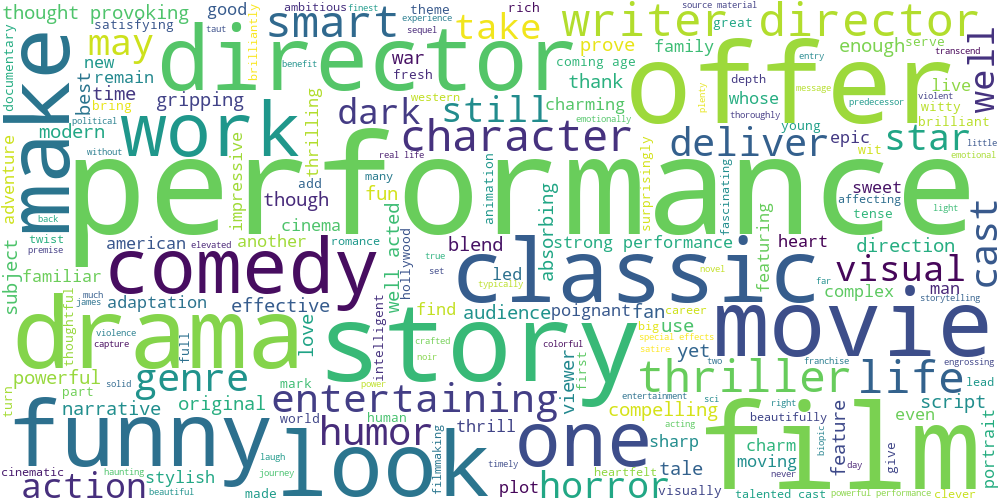

In [49]:
# Certified word cloud

text = " ".join(cert["critics_consensus_clean"])
wordcloud = WordCloud(width=1000, height=500, background_color = 'white',).generate(text)
fig = px.imshow(wordcloud, title="Word Cloud of Certified-Fresh Status")
fig.show()

- We see common ideas accross all three; with film, performance, director, comedy, thriller among others 

### predictive modeling for sentiment analysis

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8078 entries, 0 to 17710
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_title              8078 non-null   object 
 1   movie_info               8078 non-null   object 
 2   critics_consensus        8078 non-null   object 
 3   content_rating           8078 non-null   object 
 4   genres                   8078 non-null   object 
 5   directors                8078 non-null   object 
 6   authors                  8078 non-null   object 
 7   actors                   8078 non-null   object 
 8   original_release_date    8078 non-null   object 
 9   streaming_release_date   8078 non-null   object 
 10  runtime                  8078 non-null   float64
 11  production_company       8078 non-null   object 
 12  tomatometer_status       8078 non-null   object 
 13  tomatometer_rating       8078 non-null   float64
 14  audience_status        

In [51]:
df['tomatometer_status'].unique()

array(['Rotten', 'Certified-Fresh', 'Fresh'], dtype=object)

In [52]:
# create a new column 'label' that has 1 if certified fresh
# and 0 if rotten from tomatometer_status or fresh, to 
df['label']=df['tomatometer_status']
df['label'] = df['label'].map({'Rotten': 0,'Certified-Fresh': 1,'Fresh':0}) 

In [53]:
# assign x variable and y variables
x_train = df['critics_consensus_clean']
y_train = df['label']

In [54]:
# split dataset
# Create 90% training test, 10% validation test
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

In [55]:
# tokenize the text to allow it to be fed into models 
tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train.values) + list(x_valid.values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_valid)

- Now we run some models to asses which has the best score

In [56]:
# Logistic regression
df_vectorized = vectorizer.transform(df['critics_consensus_clean'])
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(train_vectorized, y_train)
logreg.score(test_vectorized, y_valid)

0.7277227722772277

In [57]:
# Linear SVC (support vector classification)
linsvc = LinearSVC(max_iter=2000)
linsvc.fit(train_vectorized, y_train)
linsvc.score(test_vectorized, y_valid)

0.7648514851485149

In [58]:
# Multinomial Naive Bayes classifier
multinb = MultinomialNB()
multinb.fit(train_vectorized, y_train)
multinb.score(test_vectorized, y_valid)

0.6621287128712872

In [59]:
# Bernoulli Naive Bayes classifier
bernb = BernoulliNB()
bernb.fit(train_vectorized, y_train)
bernb.score(test_vectorized, y_valid)

0.6596534653465347

In [60]:
# we go with linear SVC since it has the highest score
# and test it
preds = linsvc.predict(df_vectorized)
df['sentiment_pred'] = preds
df.head()

movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   
3  Sidney Lumet's feature debut is a superbly wri...             NR   
4  One of Disney's finest live-action adventures,...              G   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   
3                               Reginald Rose   
4                                 Earl Felton   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....            1957-04-13   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...            1954-01-01   

  streaming_release_date  runtime      production_company tomatometer_status  \
0             2015-11-25    119.0        20th Century Fox             Rotten   
1             2012-09-04     90.0  Sony Pictures Classics    Certified-Fresh   
2             2014-07-24    122.0             Waner Bros.              Fresh   
3             2017-01-13     95.0    Criterion Collection    Certified-Fresh   
4             2016-06-10    127.0                  Disney              Fresh   

   tomatometer_rating audience_status  audience_rating  \
0                49.0         Spilled             53.0   
1                87.0         Upright             64.0   
2                67.0         Spilled             53.0   
3               100.0         Upright             97.0   
4                89.0         Upright             74.0   

                             critics_consensus_clean  label  sentiment_pred  
0  though may seem like another harry potter knoc...      0               0  
1  nicole holofcener newest might seem slight pla...      1               1  
2  blake edwards bawdy comedy may score perfect d...      0               0  
3  sidney lumet feature debut superbly written dr...      1               1  
4  one disney finest live action adventures leagu...      0               1

- Looks good on the eye test, so now we conduct some analysis

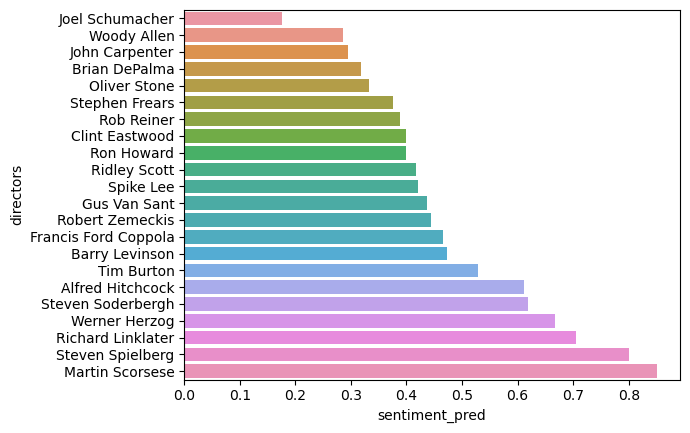

In [61]:
# create a group by df with at least 15 counts for all directors
l1 = df.groupby(df['directors'])['sentiment_pred'].count()
l1 = pd.DataFrame(l1).reset_index()
l1 = l1.loc[(l1['sentiment_pred']>=15)]

# create a df which holds only those directors from the group by
dir_filtered = df[df.directors.isin(l1['directors'])]

# create a goup by df for genres and test which has the best sentiments

sentbydir = dir_filtered.groupby(dir_filtered['directors'])['sentiment_pred'].mean()
sentbydir = pd.DataFrame(sentbydir).reset_index()
sentbydir.sort_values(by=['sentiment_pred'], inplace=True)

# Plot the average positivity of the critics consensus for the top 15 most popular 
# directors

sns.barplot(x='sentiment_pred', y='directors', data=sentbydir)
plt.show()

- Top directors according to the critics are; Martin Scorsese, Steven Spielberg & Alfred Hitchcock (perhaps unsurprisingly)
- We don't see Christopher Nolan on this list, possibly because he doesn't make movies as often as other directors
- It would seem that the most successful directors are also similarly well received by critics

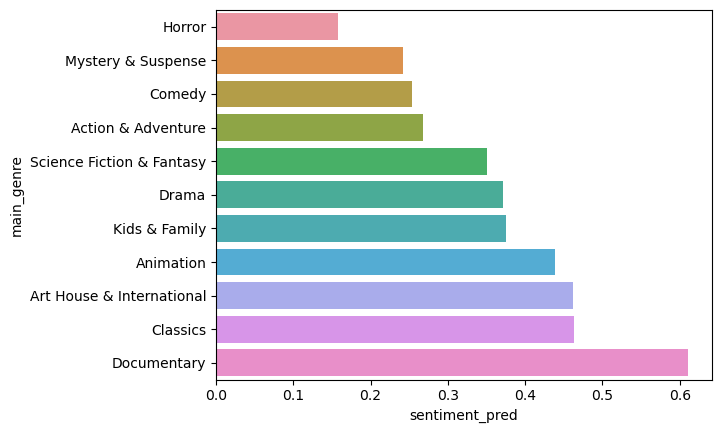

In [62]:
# recreate main_genre column for df dataframe since it was only created for
# data dataframe

df['main_genre'] = df['genres'].str.split(',',expand = True)[0]

# create a group by df with at least 15 counts for all main_genres
l2 = df.groupby(df['main_genre'])['sentiment_pred'].count()
l2 = pd.DataFrame(l2).reset_index()
l2 = l2.loc[(l2['sentiment_pred']>=15)]

# create a df which holds only those directors from the group by
gen_filtered = df[df.main_genre.isin(l2['main_genre'])]

# create a goup by df for genres and test which has the best sentiments

sentbygen = gen_filtered.groupby(gen_filtered['main_genre'])['sentiment_pred'].mean()
sentbygen = pd.DataFrame(sentbygen).reset_index()
sentbygen.sort_values(by=['sentiment_pred'], inplace=True)

# Plot the average positivity of the critics consensus for the top 15 most popular 
# directors

sns.barplot(x='sentiment_pred', y='main_genre', data=sentbygen)
plt.show()

- Documentary and classics have the best ratings and sentiments from critics
- Documentary makes sense since they have very little subjective content and usually stay close to objective narration of events. Therefore, it is potentially a lot easier to score higher for this form of movie since the main aim is simply to educate and inform as opposed to also entertain and create a sensory experience. 
- The classics are a little similar since the main goal of this genre is to recreate a different version of an existing work which also is an easier form, and could therefore receive better critique since it has an already well received existing form
- Art house & international is the next highest sentiment by critics, this also makes sense as critics are people who have seen plenty of movies, and art films tend to push the boundaries of what is percieved as current trends in movies. Since critics are people who watch movies alot, having positive sentiments about art films makes sense because for them it is a new experience and something that is not easily obtained being in the industry.
- Animation is also another type of film that is graded differently, because for these films the quality & style of the animation is a very large requirement for the film to be well received. Therefore, if this criteria is well executed (which it usually is on larger screens) the experience is again one of novelty, and therefore makes sense that it is positively received by critics.
- Horror is the most poorly recieved, which is logical, since horror movies operate on the fear and adrenalin factor. But apart from causing these sensations, they offer very little plot, and for the critic that is probably numb to these sensations from watching so many movies, the horror genre has very little to offer